In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('Housing.csv')
df.head() 
M=len(df)
M

545

In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.replace({'yes': 1, 'no': 0}, inplace=True)
df_reg = df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom','basement', 'hotwaterheating', 'airconditioning','prefarea']]
data=df_reg[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price', 'mainroad', 'guestroom','basement', 'hotwaterheating', 'airconditioning','prefarea']]

train_data, eval_data = train_test_split(data, test_size=0.2, random_state=42)
train_data

,area,bedrooms,bathrooms,stories,parking,price,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
46,6000,3,2,4,1,7525000,1,0,0,0,1,0
93,7200,3,2,1,3,6300000,1,0,1,0,1,0
335,3816,2,1,1,2,3920000,1,0,1,0,1,0
412,2610,3,1,2,0,3430000,1,0,1,0,0,1
471,3750,3,1,2,0,3010000,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,0,6755000,1,0,0,0,1,0
106,5450,4,2,1,0,6160000,1,0,1,0,1,1
270,4500,3,2,3,1,4340000,1,0,0,1,0,0
435,4040,2,1,1,0,3290000,1,0,0,0,0,0


In [6]:
XHt = train_data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
XHe = eval_data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values


In [7]:
YHt = train_data['price'].values
YHe = eval_data['price'].values

In [8]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

In [83]:
XHSt = scaler_X.fit_transform(XHt)
XHSe = scaler_X.transform(XHe)
YHSt = scaler_y.fit_transform(YHt.reshape(-1, 1)).ravel()

array([[ 0.38416819,  0.05527092,  1.53917323, ...,  1.50124327,
         0.36795665, -0.55262032],
       [ 0.9291807 ,  0.05527092,  1.53917323, ...,  1.50124327,
         2.70998729, -0.55262032],
       [-0.60775457, -1.28351359, -0.5579503 , ...,  1.50124327,
         1.53897197, -0.55262032],
       ...,
       [-0.29709744,  0.05527092,  1.53917323, ..., -0.66611456,
         0.36795665, -0.55262032],
       [-0.5060189 , -1.28351359, -0.5579503 , ..., -0.66611456,
        -0.80305867, -0.55262032],
       [ 0.15707965,  0.05527092,  1.53917323, ...,  1.50124327,
         0.36795665, -0.55262032]])

In [85]:
XHSt

array([[ 0.38416819,  0.05527092,  1.53917323, ...,  1.50124327,
         0.36795665, -0.55262032],
       [ 0.9291807 ,  0.05527092,  1.53917323, ...,  1.50124327,
         2.70998729, -0.55262032],
       [-0.60775457, -1.28351359, -0.5579503 , ...,  1.50124327,
         1.53897197, -0.55262032],
       ...,
       [-0.29709744,  0.05527092,  1.53917323, ..., -0.66611456,
         0.36795665, -0.55262032],
       [-0.5060189 , -1.28351359, -0.5579503 , ..., -0.66611456,
        -0.80305867, -0.55262032],
       [ 0.15707965,  0.05527092,  1.53917323, ...,  1.50124327,
         0.36795665, -0.55262032]])

In [87]:
XHSe

array([[ 0.33875048,  1.39405543,  1.53917323, ..., -0.66611456,
         0.36795665, -0.55262032],
       [ 0.61125674,  0.05527092,  1.53917323, ...,  1.50124327,
        -0.80305867,  1.80956067],
       [-0.5060189 , -1.28351359, -0.5579503 , ..., -0.66611456,
        -0.80305867, -0.55262032],
       ...,
       [ 0.38416819,  1.39405543,  1.53917323, ...,  1.50124327,
         0.36795665, -0.55262032],
       [ 0.38416819,  0.05527092,  1.53917323, ...,  1.50124327,
         0.36795665, -0.55262032],
       [ 0.4295859 ,  0.05527092,  1.53917323, ..., -0.66611456,
         1.53897197,  1.80956067]])

In [89]:
YHSt

array([ 1.60509012,  0.90746568, -0.44791897, -0.72696874, -0.96615427,
       -0.04927642, -1.68371084, -0.96615427, -1.24520405, -0.56751173,
       -0.57149815, -1.2850683 , -0.28846195, -0.60737598, -0.60737598,
        0.38524395, -1.6739441 ,  0.30950186, -0.68710449,  1.18651545,
       -0.44791897, -0.44791897,  0.6284159 ,  0.30950186,  0.7081444 ,
       -0.68710449, -1.30898685, -1.16547554,  0.32943399, -0.58744385,
       -0.28846195, -1.38472894, -0.64724024, -0.04927642, -0.28846195,
       -0.92230359, -0.82662938,  2.36251095, -0.60737598,  1.50144306,
       -0.00941217, -0.22866557, -0.60737598, -0.17285561, -0.24859769,
       -1.00601852,  0.05038421,  2.18312181, -0.26852982,  1.70475076,
       -0.68710449, -0.766833  ,  0.15004485, -0.88642576,  0.46895888,
        0.66828015, -0.56751173, -0.60737598,  2.1033933 ,  0.78388649,
        0.03045208, -0.92629001,  0.30551544,  1.44563311, -0.08914068,
        2.20305393,  2.42230733, -0.68710449,  1.26624396, -0.05

In [91]:
YHe

array([ 4060000,  6650000,  3710000,  6440000,  2800000,  4900000,
        5250000,  4543000,  2450000,  3353000, 10150000,  2660000,
        3360000,  3360000,  2275000,  2660000,  2660000,  7350000,
        2940000,  2870000,  6720000,  5425000,  1890000,  5250000,
        4193000, 12250000,  3080000,  5110000,  9800000,  2520000,
        6790000,  3500000,  6650000,  2940000,  3325000,  4200000,
        4900000,  3290000,  3500000,  2380000,  5495000,  3675000,
        6650000,  4907000,  3150000,  4480000,  6580000,  5740000,
        3003000,  1820000,  8400000,  2450000,  4270000,  4007500,
        3234000,  1750000,  9800000,  2100000,  4340000,  3045000,
        3850000,  3500000,  4753000,  3080000,  4550000,  6510000,
        6685000,  5110000,  4550000,  6650000,  3640000,  5600000,
        3780000,  6615000,  3220000,  6650000,  4690000,  4830000,
        6860000,  2233000,  7035000,  4165000,  6195000,  6510000,
        1890000,  8190000,  2660000,  4193000, 13300000,  9681

In [10]:
svr = SVR(kernel='linear', C = 1000) 
svr.fit(XHSt, YHSt.ravel())

SVR(C=1000, kernel='linear')

In [95]:
y_pred_s = svr.predict(XHSe)
y_pred = scaler_y.inverse_transform(y_pred_s.reshape(-1, 1)).ravel()

In [99]:
y_pred

array([5270249.81223114, 6948029.2748244 , 3072976.30090721,
       4437502.33360503, 3040109.91289442, 3715059.77152288,
       5201534.58256648, 6032968.08160441, 2867355.98424087,
       2352890.99418624, 9350031.39060993, 3047054.31361557,
       3266375.48970623, 3382266.54877654, 3974112.11781461,
       5281535.25093315, 3066419.92664941, 4879822.50397078,
       4631633.6925462 , 3552288.51934994, 6059638.22217948,
       5634657.78821451, 2977358.40435252, 4934251.80944916,
       5121773.24536205, 7485881.94690583, 3451227.56821965,
       4927016.34434237, 7910177.24341312, 3310966.97692628,
       6283579.1673064 , 3524783.11912147, 6364483.8573242 ,
       4181701.93944931, 3718432.74303503, 5556237.66025999,
       4706306.00292229, 4418361.20432999, 3194381.5736143 ,
       4251054.23369784, 4418735.29529587, 3623455.89051855,
       6928465.51054168, 3788893.93338442, 3735698.80700749,
       4372682.60903759, 6685469.62672197, 3883192.01145618,
       4053609.97232327,

In [12]:
errors = y_pred - YHe

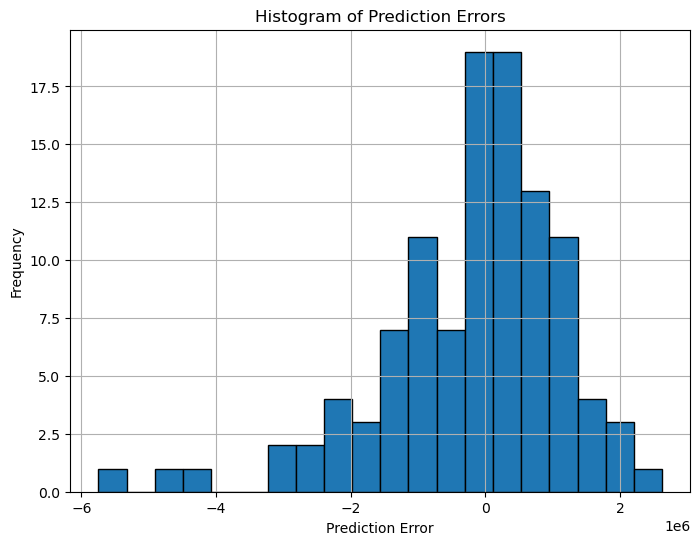

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=20, edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.grid(True)
plt.show()

In [14]:
mse = mean_squared_error(YHe, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1931931244839.3755


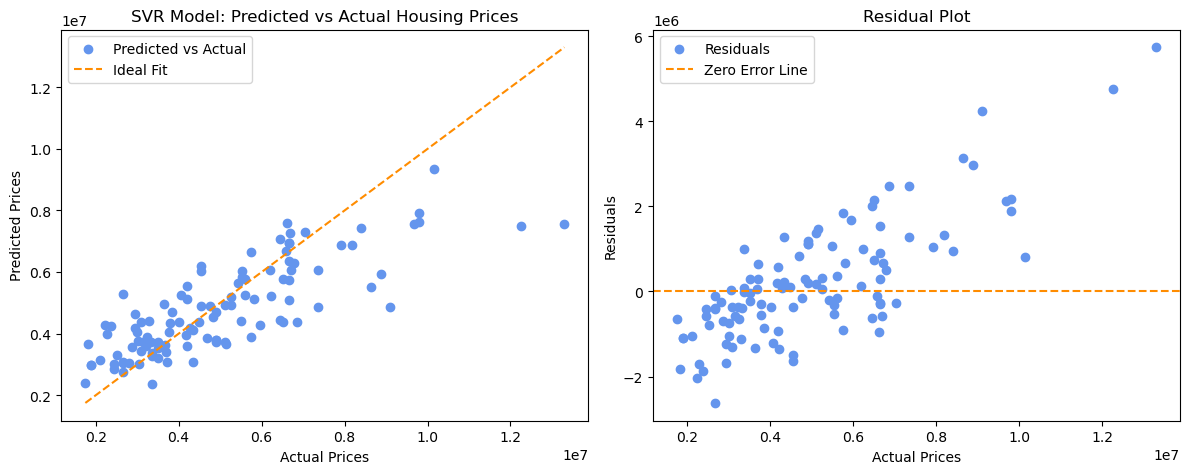

In [15]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(YHe, y_pred, color='cornflowerblue', label='Predicted vs Actual')
plt.plot([min(YHe), max(YHe)], [min(YHe), max(YHe)], color='darkorange', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.title('SVR Model: Predicted vs Actual Housing Prices')

residuals = YHe - y_pred
plt.subplot(1, 2, 2)
plt.scatter(YHe, residuals, color='cornflowerblue', label='Residuals')
plt.axhline(0, color='darkorange', linestyle='--', label='Zero Error Line')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

In [16]:
# Linear Regression Compairison
def predicted_y(theta,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(theta@x[i]+intercept)
    return np.array(y_lst)

def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

def dldt(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s

def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s

def gradient_descent(x,y,learning_rate,iterations):
    theta_vector=np.zeros(x.shape[1])
    intercept=0
    n = len(x)
    linear_loss=[]

    for i in range(iterations):
        
        
        y_predicted = predicted_y(theta_vector,x,intercept)
        
        theta_vector = theta_vector - learning_rate *dldt(x,y,y_predicted) 
        
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
    
    return theta_vector,intercept, linear_loss

In [17]:
iterations = 1000
learning_rate = 0.01

In [18]:
t,b,l=gradient_descent(XHSt,YHt,learning_rate,iterations)

In [19]:
def predict(inp, t, b):
    y_lst=[]
    for i in range(len(inp)):
        y_lst.append(t@inp[i]+b)
    return np.array(y_lst)

In [20]:
y_pred_A2=predict(XHe, t, b)

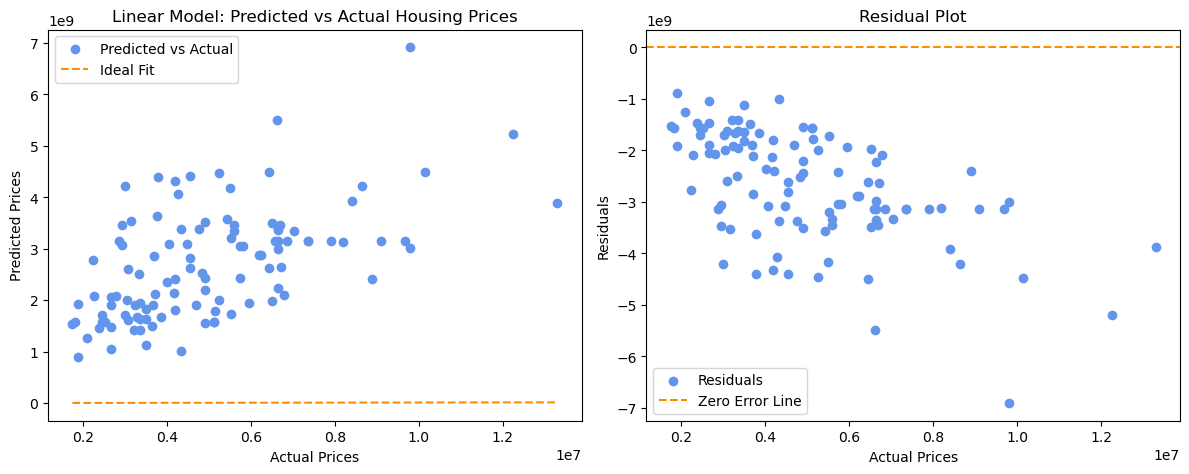

In [21]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(YHe, y_pred_A2, color='cornflowerblue', label='Predicted vs Actual')
plt.plot([min(YHe), max(YHe)], [min(YHe), max(YHe)], color='darkorange', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.title('Linear Model: Predicted vs Actual Housing Prices')

residuals = YHe - y_pred_A2
plt.subplot(1, 2, 2)
plt.scatter(YHe, residuals, color='cornflowerblue', label='Residuals')
plt.axhline(0, color='darkorange', linestyle='--', label='Zero Error Line')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

In [22]:
def lossComp(y, y_predicted, iterations, linear_loss):
    experimental_loss=[]
    for i in range(iterations):
        experimental_loss.append(loss(y,y_predicted))
    plt.plot(np.arange(1,iterations),linear_loss[1:])
    plt.plot(np.arange(1,iterations),experimental_loss[1:])
    plt.xlabel("number of iterations")
    plt.ylabel("loss")

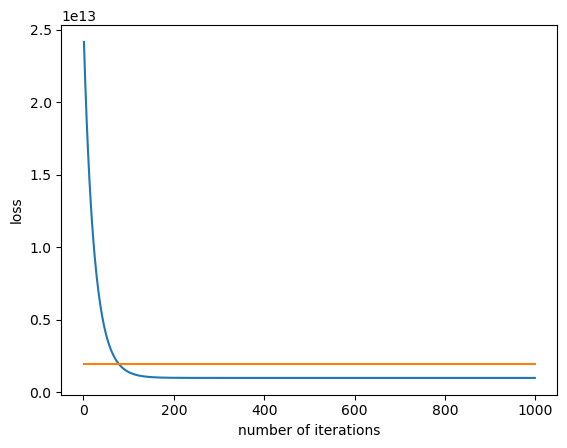

In [23]:
lossComp(YHe, y_pred, iterations, l)

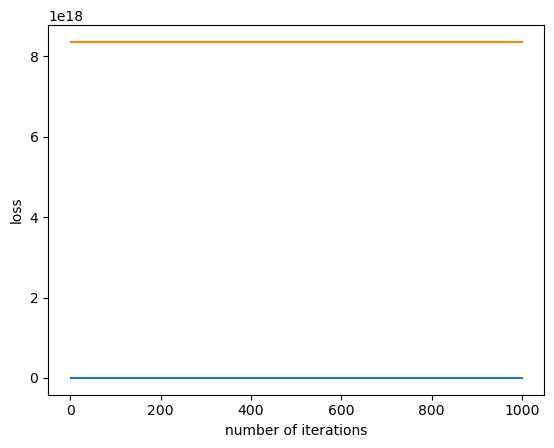

In [24]:
lossComp(YHe, y_pred_A2, iterations, l)

In [25]:
svrp = SVR(kernel='poly')
svrp.fit(XHSt, YHSt.ravel())

SVR(kernel='poly')

In [26]:
y_pred_sp = svrp.predict(XHSe)
y_pred_p = scaler_y.inverse_transform(y_pred_sp.reshape(-1, 1)).ravel()

In [27]:
mse = mean_squared_error(YHe, y_pred_p)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2317528829710.52


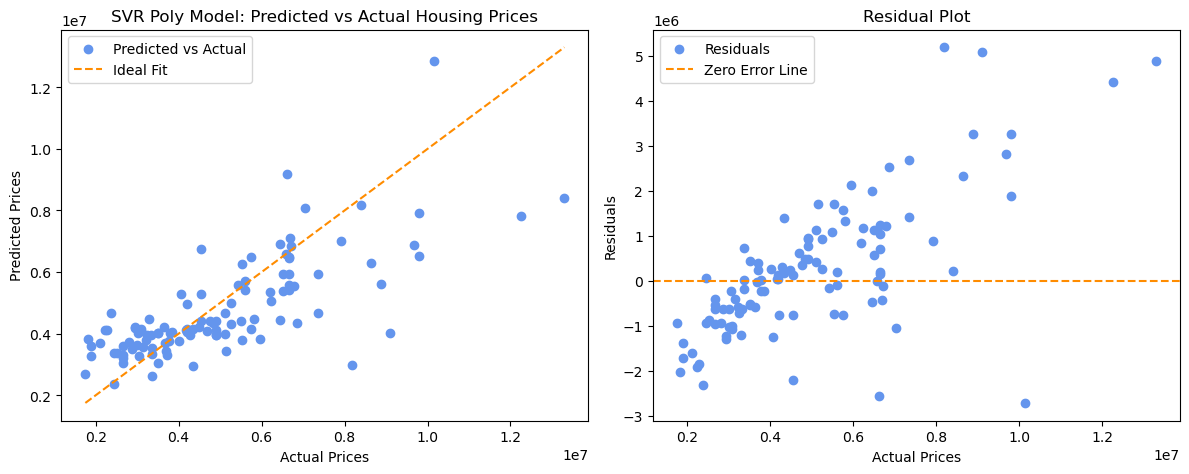

In [28]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(YHe, y_pred_p, color='cornflowerblue', label='Predicted vs Actual')
plt.plot([min(YHe), max(YHe)], [min(YHe), max(YHe)], color='darkorange', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.title('SVR Poly Model: Predicted vs Actual Housing Prices')

residuals = YHe - y_pred_p
plt.subplot(1, 2, 2)
plt.scatter(YHe, residuals, color='cornflowerblue', label='Residuals')
plt.axhline(0, color='darkorange', linestyle='--', label='Zero Error Line')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

In [29]:
svrb = SVR(kernel='rbf')
svrb.fit(XHSt, YHSt.ravel())

SVR()

In [30]:
y_pred_sb = svrb.predict(XHSe)
y_pred_b = scaler_y.inverse_transform(y_pred_sb.reshape(-1, 1)).ravel()

In [31]:
mse = mean_squared_error(YHe, y_pred_b)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2037241759268.8447


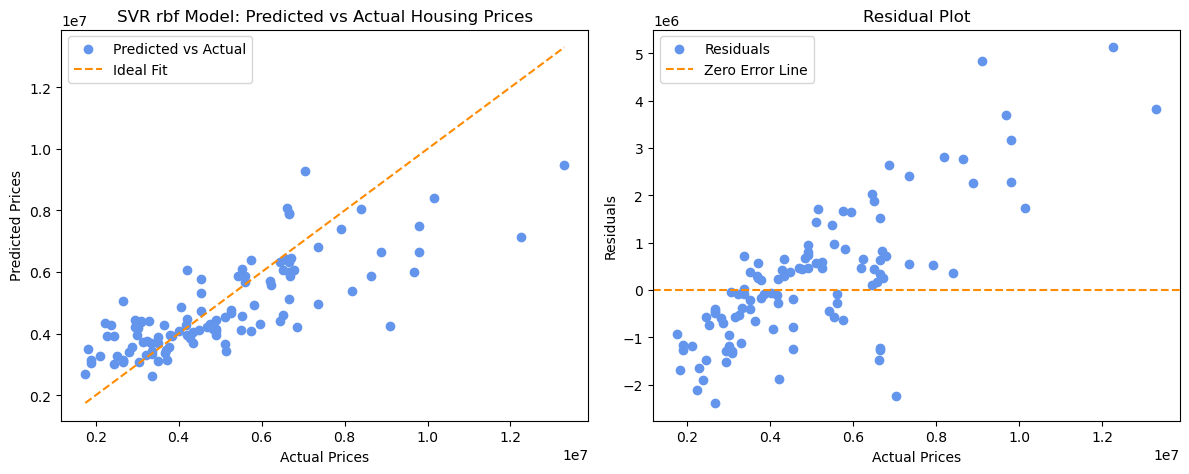

In [32]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(YHe, y_pred_b, color='cornflowerblue', label='Predicted vs Actual')
plt.plot([min(YHe), max(YHe)], [min(YHe), max(YHe)], color='darkorange', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.title('SVR rbf Model: Predicted vs Actual Housing Prices')

residuals = YHe - y_pred_b
plt.subplot(1, 2, 2)
plt.scatter(YHe, residuals, color='cornflowerblue', label='Residuals')
plt.axhline(0, color='darkorange', linestyle='--', label='Zero Error Line')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

In [71]:
def mean_squared_error(y, y_pred):
    return np.mean((y - y_pred) ** 2)

def mean_absolute_error(y, y_pred):
    return np.mean(np.abs(y - y_pred))

def r2_score(y, y_pred):
    ss_res = np.sum((y - y_pred) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    return 1 - (ss_res / ss_tot)

def apply_pca(x, k):
    pca = PCA(n_components=k)
    return pca.fit_transform(x), pca

def generate_k_values(max_value):
    return list(range(1, max_value + 1))

def train_k_values(x_train, y_train, x_eval, y_eval, k_values, kernels):
    results = {}
    y_eval = np.ravel(y_eval)

    for kernel in kernels:
        best_k = None
        best_mse = float('inf')
        best_mae = float('inf')
        best_r2 = float('-inf')
        mse_scores = []
        mae_scores = []
        r2_scores = []

        for k in k_values:
            x_pca_train, pca = apply_pca(x_train, k)
            x_pca_eval = pca.transform(x_eval)
            svr = SVR(kernel=kernel)
            svr.fit(x_pca_train, y_train.ravel())
            y_pred = svr.predict(x_pca_eval)
            
            mse = mean_squared_error(y_eval, y_pred)
            mae = mean_absolute_error(y_eval, y_pred)
            r2 = r2_score(y_eval, y_pred)
            mse_scores.append(mse)
            mae_scores.append(mae)
            r2_scores.append(r2)
            
            if mse < best_mse:
                best_mse = mse
                best_k = k
            if mae < best_mae:
                best_mae = mae
            if r2 > best_r2:
                best_r2 = r2

        plt.plot(range(len(mse_scores)), mse_scores, marker='o', linestyle='-', color='b')
        plt.xlabel('K Value')
        plt.ylabel('Mean Squared Error')
        plt.title(f'{kernel} - MSE')
        plt.grid(True)
        plt.show()
        print(best_mse)

        plt.plot(range(len(mae_scores)), mae_scores, marker='o', linestyle='-', color='g')
        plt.xlabel('K Value')
        plt.ylabel('Mean Absolute Error')
        plt.title(f'{kernel} - MAE')
        plt.grid(True)
        plt.show()
        print(best_mae)

        plt.plot(range(len(r2_scores)), r2_scores, marker='o', linestyle='-', color='r')
        plt.xlabel('K Value')
        plt.ylabel('R2 Score')
        plt.title(f'{kernel} - R2')
        plt.grid(True)
        plt.show()
        print(best_r2)

        results[kernel] = {
            'best_k': best_k,
            'best_mse': best_mse,
            'best_mae': best_mae,
            'best_r2': best_r2,
            'mse_scores': np.array(mse_scores),
            'mae_scores': np.array(mae_scores),
            'r2_scores': np.array(r2_scores)
        }
    return results


In [73]:
k_values = generate_k_values(XHSt.shape[1])

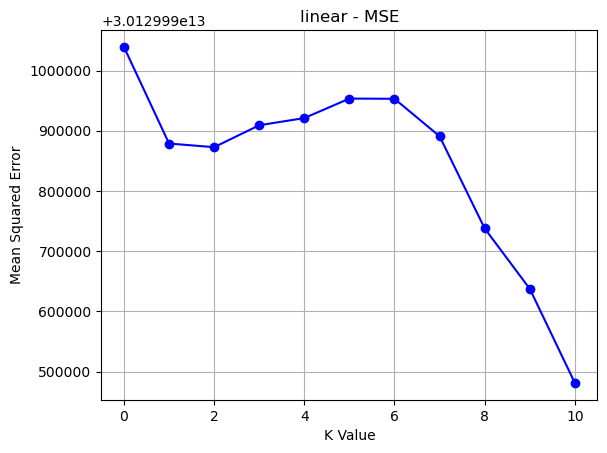

30129990481385.047


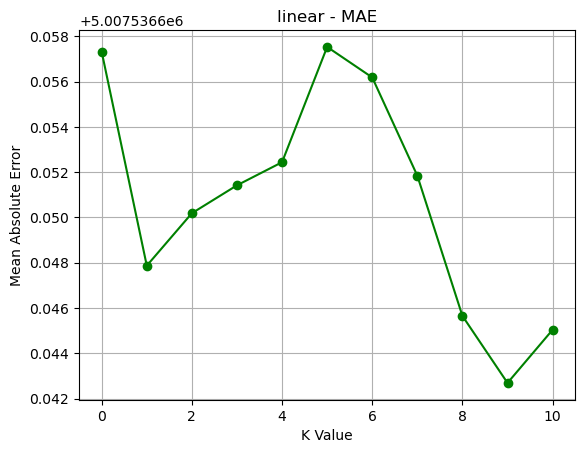

5007536.642695019


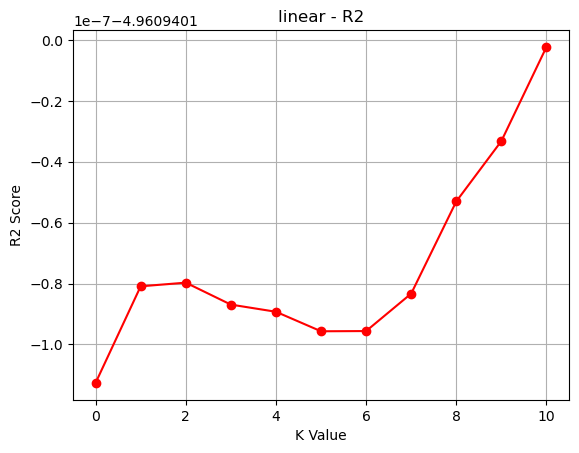

-4.960940102293455


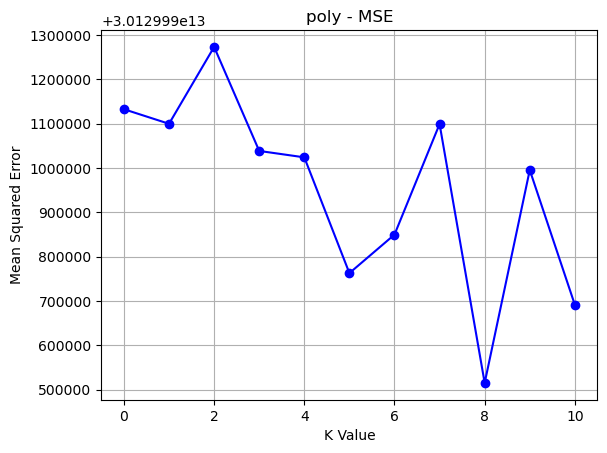

30129990515057.188


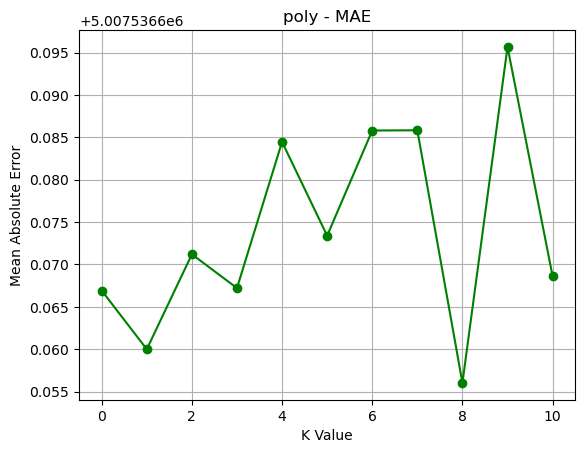

5007536.656023805


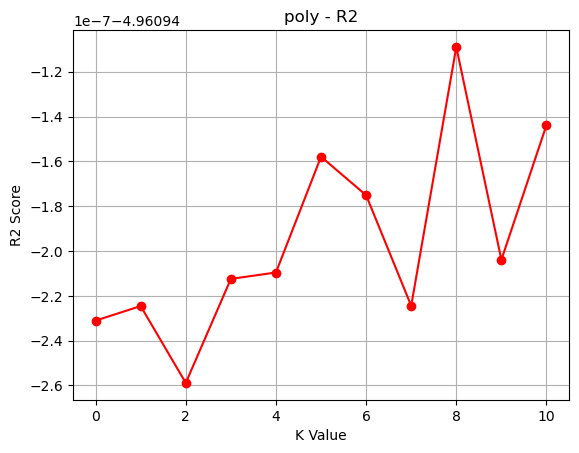

-4.960940108955177


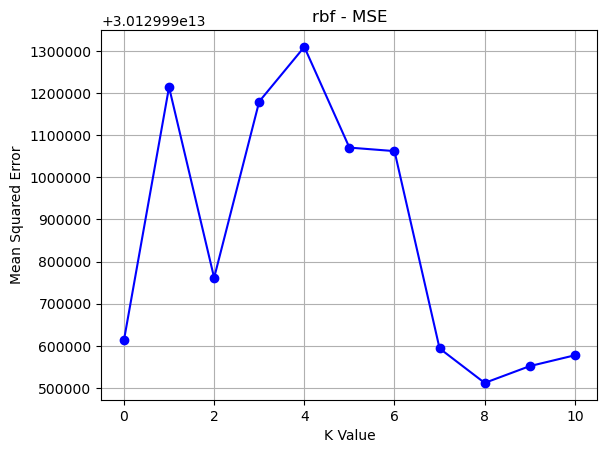

30129990512256.87


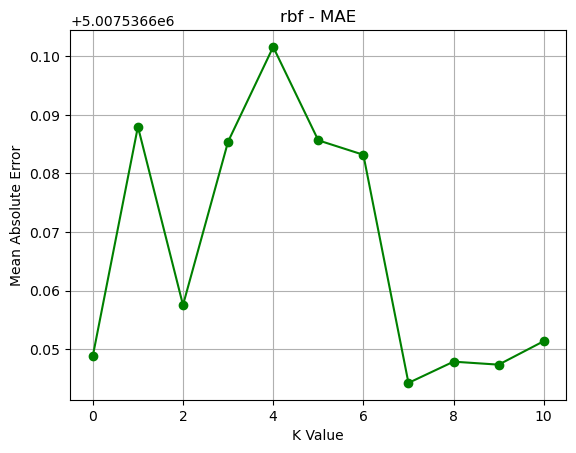

5007536.644220824


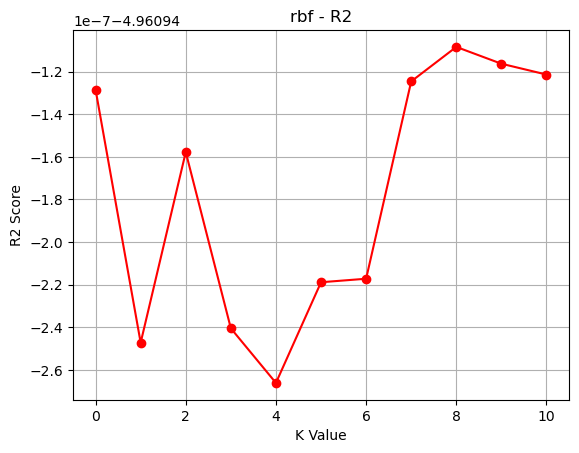

-4.960940108401161


In [75]:
kernels = ['linear', 'poly', 'rbf']
results = train_k_values(XHSt, YHSt, XHSe, YHe, k_values, kernels)